<a href="https://colab.research.google.com/github/LudovicaCi/saliency-benchmark/blob/main/chart_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and Model


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

saliency_methods = ['GradCAM', 'SIDU', 'RISE', 'LIME']
datasets = ['CIFAR-10', 'CIFAR-100', 'MNIST', 'Caltech-101', 'svhn', 'oxford-iiit-pet', 'oxford-flowers']

# "Insertion" and "Deletion" data for each saliency method and each dataset
# [fine_tuned_cifar10, non_fine_tuned_cifar10, fine_tuned_cifar100, non_fine_tuned_cifar100, fine_tuned_mnist, non_fine_tuned_mnist, fine_tuned_caltech101, non_fine_tuned_caltech101,
# fine_tuned_svhn, non_fine_tuned_svhn, fine_tuned_oxford-iiit-pet, non_fine_tuned_oxford-iiit-pet, fine_tuned_oxford-flowers, non_fine_tuned_oxford-flowers]
ResNet18_insertion_values = {
    'GradCAM': [0.49168469421578803, 0.17973499682832003, 0.141975653818838, 0.026880153417193065, 0.11438869115427329, 0.08219119830199637, 0.415800215454364, 0.21213443254821007, 0.7897362668660092, 0.35338691367624614, 0.12469459803973489, 0.08376579101810872, 0.14598988849366493, 0.17092081208194465],
    'SIDU': [0.5008166122345713, 0.17657279777766374, 0.13438454986604026, 0.02458991119576192, 0.12689441811723265, 0.09171755519149827, 0.38267392655455235, 0.20527788185348075, 0.7915313683002051, 0.20621351114004915, 0.12385304550616633, 0.08188851113247797, 0.11485841768266929, 0.15932982600042625],
    'RISE': [0.25972258211071214, 0.15115126541644747, 0.06311316136545267, 0.020677082263977267, 0.11202192264503524, 0.09964910962544163, 0.2639116592427991, 0.1571521990133682, 0.5783302177912305, 0.20143991826369823, 0.06555951674610405, 0.052516916227399194, 0.07133911678641863, 0.108608720831805],
    'LIME': [0.39478246476322226, 0.17657279777766374, 0.11708624033882718, 0.020677082263977267, 0.11644239812996414, 0.08119592415020273, 0.4310072123496484, 0.20554303870354548, 0.7440271279476008, 0.2068142314569839, 0.09547955940944902, 0.07620155686790009, 0.10814767057368903, 0.17085381400426358]
}

ResNet18_deletion_values = {
    'GradCAM': [0.1545283630683759, 0.1253554101990412, 0.0317097857407377, 0.015744380163973618, 0.11497705762010478, 0.07696222439172447, 0.107459809671759, 0.1218810007259273, 0.17013051530712744, 0.19495517254340833, 0.034936853739720226, 0.034317384438278385, 0.03692565138494234, 0.05232811943787539],
    'SIDU': [0.15530022794563578, 0.1253554101990412, 0.03381564080169144, 0.014175515071184424, 0.11496387837762989, 0.09568434514535179, 0.12931640674766592, 0.1278140711705878, 0.17820052718539134, 0.2013258474041522, 0.035549722727370454, 0.034672742751393086, 0.043367592855871544, 0.03381436031130526],
    'RISE': [0.1588251227604007, 0.12799041386988855, 0.031405831681165564, 0.0154598970769903, 0.11338987718075808, 0.08785528002264817, 0.132960250676809, 0.13491965732562375, 0.2488652551836135, 0.1847567114536627, 0.04820671233958502, 0.041625522520845136, 0.04542238683106376, 0.0677859921002596],
    'LIME': [0.18261149775841815, 0.12412829611504407, 0.04788026564514166, 0.01776547254184407, 0.11374659699327924, 0.10682427340736342, 0.1511567006297948, 0.12224450203644102, 0.2968790843531272, 0.19256897369557277, 0.0483091454420179, 0.04250474330843645, 0.056999943930583365, 0.06767561383053894]
}

VGG11_insertion_values = {
    'GradCAM': [0.3878395588143312, 0.3255501082922574, 0.0820523023486404, 0.08256670561549906, 0.8145703322823044, 0.7672483194268124, 0.436972137704655, 0.47239920530524127, 0.6714246879188529, 0.35338691367624614, 0.14534383238415433, 0.16014532285827673, 0.16875985914893227, 0.1255941515245107],
    'SIDU': [0.35611425268004093, 0.31947658663912387, 0.07041984455617142, 0.07971354465652894, 0.8966762710777948, 0.8074384131307848, 0.39525585695133875, 0.3967730683127487, 0.5930329825527604, 0.40984086984306567, 0.10602322193512967, 0.17204933031358327, 0.1154720046839668, 0.1084425318992593],
    'RISE': [0.23220765412113736, 0.2097590788913632, 0.05567287332939398, 0.049004066966476335, 0.6155935089200825, 0.507015716871707, 0.35480920002285765, 0.28126900922335524, 0.5127783968794004, 0.29806824059414605, 0.08766399801653711, 0.09702537583147249, 0.11363264266061598, 0.07326330801649727],
    'LIME': [0.3720237992127922, 0.3564425625525548, 0.07503680632767082, 0.08135417200706516, 0.8596367515884685, 0.6861348911320342, 0.49492540854405465, 0.4657351910436644, 0.6691308004264745, 0.39705710567373426, 0.1252864051894815, 0.14979184857486874, 0.17698230340394244, 0.13597221681131352]
}

VGG11_deletion_values = {
    'GradCAM': [0.13965878773101775, 0.12065038812999435, 0.033320806216705, 0.023417537204124667, 0.4337643449508435, 0.27425047180007106, 0.209917815307012, 0.12343482264139105, 0.27940625137446795, 0.19461102510378872, 0.04412068424074165, 0.049906174056443445, 0.05191641098332568, 0.03381881650281189],
    'SIDU': [0.14465784878829338, 0.14465784878829338, 0.031951274135263996, 0.025939979399324638, 0.2417828915530947, 0.2545854881085626, 0.2119184699339528, 0.18201292864709762, 0.3267330315544454, 0.2074112246744209, 0.0617757085356224, 0.04455424169962874, 0.08506684453176919, 0.041797437066102235],
    'RISE': [0.13726713610158098, 0.11633284339001133, 0.03009028254354365, 0.020978166181224337, 0.5327919633219556, 0.4838837926692261, 0.18296419730903252, 0.18220942268437362, 0.28669975811056225, 0.20526904351143885, 0.06589226050871111, 0.07207730409013399, 0.08070312660737317, 0.055342156819504974],
    'LIME': [0.14234410758075744, 0.1339251075493536, 0.03644442601982964, 0.0378481656520977, 0.5200877943146545, 0.5459830125230732, 0.18947953979776408, 0.16568294522403956, 0.3444456675582145, 0.23172582996885066, 0.05759464500523714, 0.06517605126303933, 0.06324888389849528, 0.043378943035337736]
}

In [ ]:
values = ResNet18_deletion_values

# Bar Chart Generator

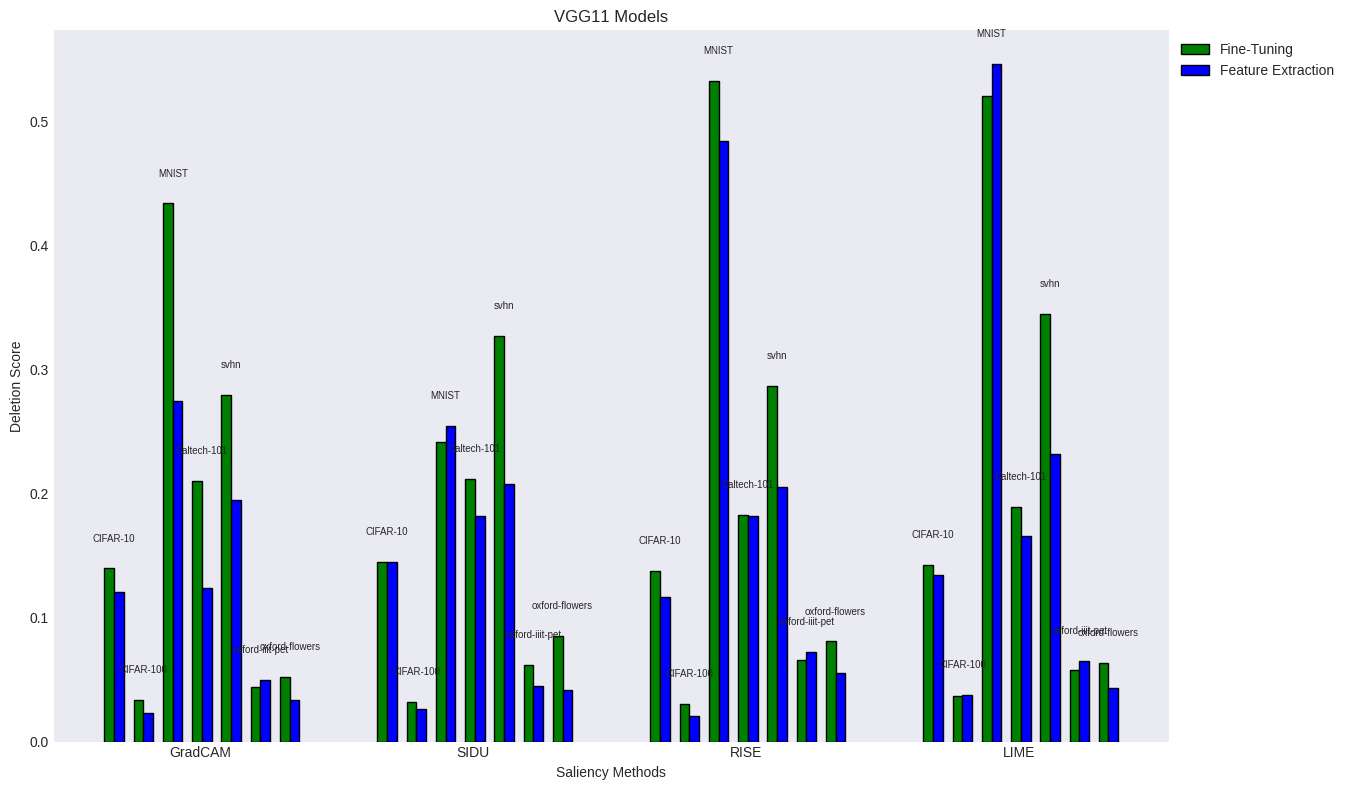

In [ ]:
# Parameters for the bar chart
bar_width = 0.2
spacing = 0.4  # Space between pairs of bars
method_spacing = (len(datasets) * 2 * bar_width + (len(datasets) - 1) * spacing)  # Total distance between groups of methods
index = np.arange(len(saliency_methods)) * (method_spacing + spacing)

fig, ax = plt.subplots(figsize=(16, 8))

# Create bars for each saliency method
for i, method in enumerate(saliency_methods):
    fintunata_values = values[method][0::2]  # values for fine-tuned networks
    non_fintunata_values = values[method][1::2]  # values for non-fine-tuned networks

    for j, dataset in enumerate(datasets):
        pos_fintunata = index[i] + j * (bar_width + spacing)
        pos_non_fintunata = pos_fintunata + bar_width

        # Bars
        ax.bar(pos_fintunata, fintunata_values[j], bar_width, color='green', edgecolor='black', label='Fine-Tuning' if i == 0 and j == 0 else "")
        ax.bar(pos_non_fintunata, non_fintunata_values[j], bar_width, color='blue', edgecolor='black', label='Feature Extraction' if i == 0 and j == 0 else "")

        # Add the name of the dataset above the pairs of bars
        mid_point = (pos_fintunata + pos_non_fintunata) / 2
        max_height = max(fintunata_values[j], non_fintunata_values[j])
        ax.text(mid_point, max_height + 0.02, dataset, ha='center', va='bottom', fontsize=7, rotation=0)

# Axis settings
ax.set_xlabel('Saliency Methods')
ax.set_ylabel('Deletion Score')
ax.set_title('VGG11 Models')

# Set labels in the center of the bar groups
xticks_positions = index + method_spacing / 2.8
ax.set_xticks(xticks_positions)
ax.set_xticklabels(saliency_methods)

# Add legend
handles, labels = ax.get_legend_handles_labels()
# Remove duplicates and sort
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1))

# Remove grid
ax.grid(False)

# Adjust margins to display the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()


# Scatter Plot Generator

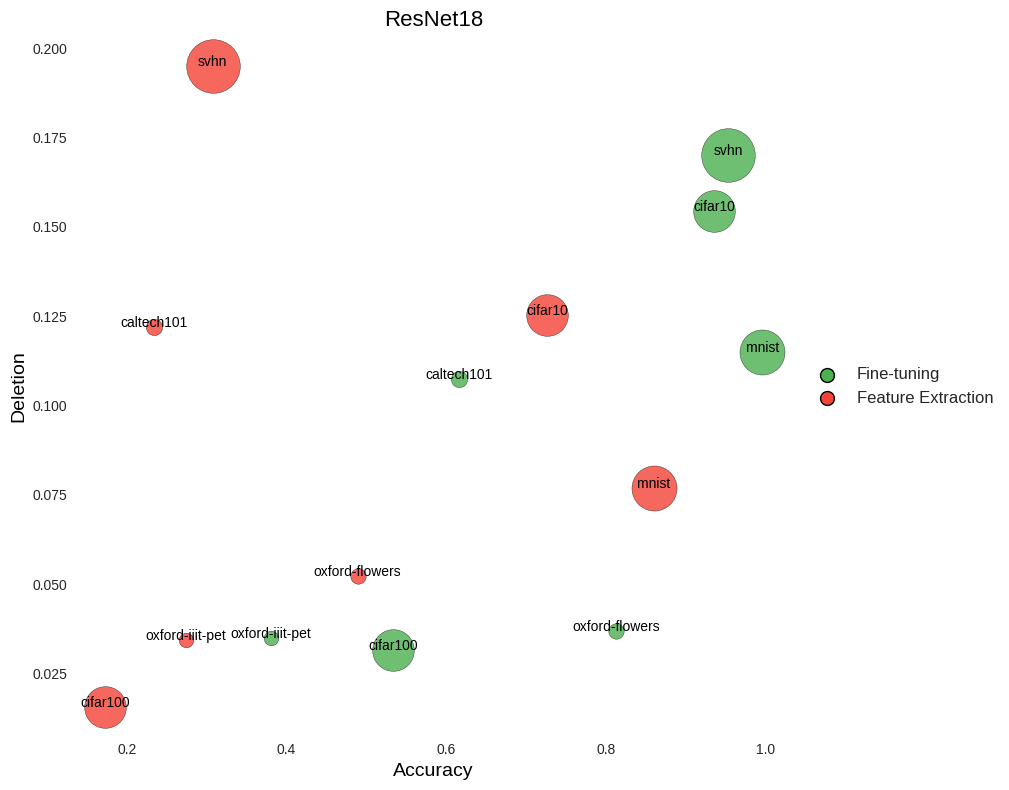

In [ ]:
import matplotlib.pyplot as plt

# Datasets and their sizes (including oxford-flowers)
datasets = ['cifar10', 'cifar100', 'mnist', 'caltech101', 'svhn', 'oxford-iiit-pet', 'oxford-flowers']
sizes = {
    'cifar10': 60000,
    'cifar100': 60000,
    'mnist': 70000,
    'caltech101': 9144,
    'svhn': 99289,
    'oxford-iiit-pet': 7349,
    'oxford-flowers': 8189
}

# Accuracy (example values, should be replaced with actual values)
ResNet_accuracy = {
    'cifar10': [0.936, 0.7269],
    'cifar100': [0.534, 0.1729],
    'mnist': [0.9959, 0.8599],
    'caltech101': [0.6161, 0.234],
    'svhn': [0.95321, 0.30762],
    'oxford-iiit-pet': [0.38043, 0.27446],
    'oxford-flowers': [0.8128, 0.489]
}

VGG11_accuracy = {
    'cifar10': [0.9123, 0.8695],
    'cifar100': [0.3347, 0.2852],
    'mnist': [0.9949, 0.9923],
    'caltech101': [0.7043, 0.7521],
    'svhn': [0.9379, 0.8735],
    'oxford-iiit-pet': [0.489, 0.64266],
    'oxford-flowers': [0.5252, 0.5194]
}

accuracy = ResNet_accuracy

# Colors for the points
fine_tuned_color = '#4CAF50'  # Green for fine-tuning
non_fine_tuned_color = '#F44336'  # Red for feature extraction

# Create the plot with a transparent background
plt.figure(figsize=(12, 8), facecolor='none')

for i, dataset in enumerate(datasets):
    # Accuracy for fine-tuned and non-fine-tuned networks
    fine_tuned_accuracy = accuracy[dataset][0]
    non_fine_tuned_accuracy = accuracy[dataset][1]

    if 2 * i < len(values['GradCAM']):
        fine_tuned_insertion = values['GradCAM'][2 * i]  # Replace with the desired method
        non_fine_tuned_insertion = values['GradCAM'][2 * i + 1]

        size = sizes[dataset] / 1000  # Scale the size for the plot

        # Points for fine-tuned dataset (green) with black edges
        plt.scatter(fine_tuned_accuracy, fine_tuned_insertion, s=size * 15, color=fine_tuned_color,
                    edgecolor='black', linewidth=0.3, alpha=0.8, label=dataset if i == 0 else "")

        # Points for non-fine-tuned dataset (red) with black edges
        plt.scatter(non_fine_tuned_accuracy, non_fine_tuned_insertion, s=size * 15, color=non_fine_tuned_color,
                    edgecolor='black', linewidth=0.3, alpha=0.8)

        # Add text above each fine-tuned and non-fine-tuned point with black text
        plt.text(fine_tuned_accuracy, fine_tuned_insertion, dataset, fontsize=10, ha='center', color='black')
        plt.text(non_fine_tuned_accuracy, non_fine_tuned_insertion, dataset, fontsize=10, ha='center', color='black')

# Customize the plot
plt.xlabel('Accuracy', fontsize=14, color='black')
plt.ylabel('Deletion', fontsize=14, color='black')
plt.title('ResNet18', fontsize=16, color='black')

# Remove grid and set axes background transparent
plt.grid(False)
plt.gca().patch.set_alpha(0)  # Set axes background to transparent

# Add fine-tuning and feature extraction labels to the legend
legend_handles = []
legend_handles.append(plt.scatter([], [], color=fine_tuned_color, edgecolor='black', label='Fine-tuning', s=100))
legend_handles.append(plt.scatter([], [], color=non_fine_tuned_color, edgecolor='black', label='Feature Extraction', s=100))

# Place the legend outside of the plot area
plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, frameon=False)

# Adjust layout to fit the legend outside the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot with transparent background
plt.show()
